In [61]:
# iPython magic
%matplotlib inline

# Data Loading

In [62]:
import pandas as pd

In [63]:
df = pd.read_feather(
    '../data/preprocessed/adult.feather',
#     'https://raw.githubusercontent.com/sesise0307/pydata2021-eda/main/data/preprocessed/adult.feather',
)

In [64]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,hours_per_week,native_country,income,age_group,income_exceed_50k,fake_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,40,United-States,<=50K,30~39,False,44506
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,13,United-States,<=50K,50~59,False,48120
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,40,United-States,<=50K,30~39,False,13343
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,40,United-States,<=50K,50~59,False,42772
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,40,Cuba,<=50K,20~29,False,37312


# Plot with Matplotlib

https://matplotlib.org/stable/contents.html

basic building block, essential for fine-tuning

- lineplot, scatterplot, heatmap, etc

In [65]:
import matplotlib.pyplot as plt

## Scatter Plot

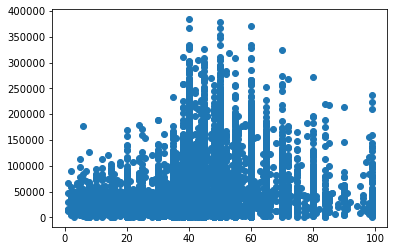

In [66]:
plt.scatter(df['hours_per_week'], df['fake_income'])

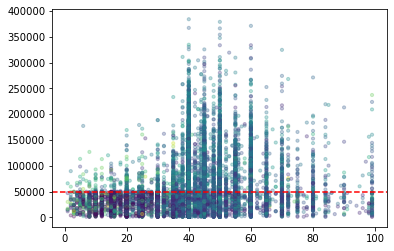

In [67]:
plt.scatter(df['hours_per_week'], df['fake_income'], c=df['age'], alpha=0.3, s=10)
plt.axhline(50000, color='r', ls='--');

## Histogram

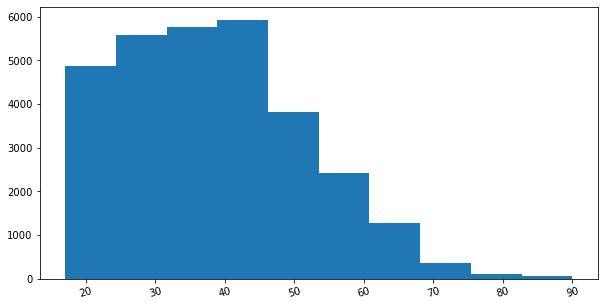

In [72]:
plt.figure(figsize=(10, 5))
plt.hist(df['age'])
plt.xticks(rotation=15);

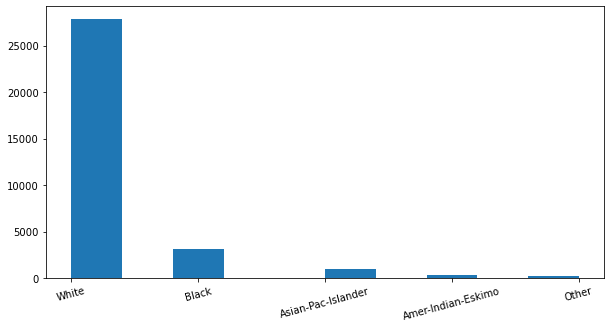

In [59]:
plt.figure(figsize=(10, 5))
plt.hist(df['race'].dropna())
plt.xticks(rotation=15);

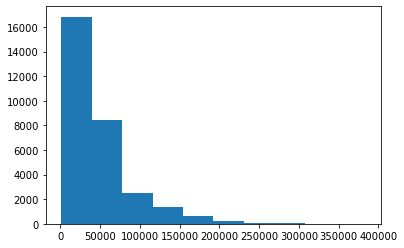

In [74]:
plt.hist(df['fake_income']);

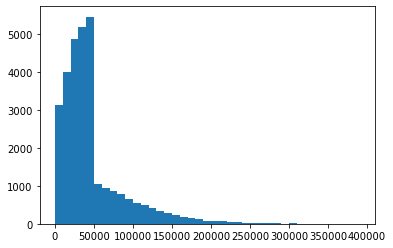

In [76]:
plt.hist(df['fake_income'], bins=range(0, 400000, 10000));

- Histogram is affected by bin selection
- To avoid that, Empirical Cumulative Distribution

## Boxplot

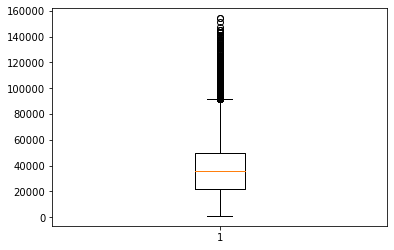

In [51]:
plt.boxplot(df['real_income']);

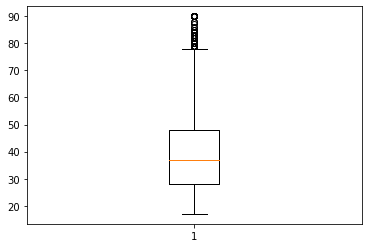

In [52]:
plt.boxplot(df['age']);

## Pie Chart

# Plot with Pandas

- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
- fine-tuning with matplotlib

In [82]:
(
    df
    .groupby('age_group')
    ['fake_income']
    .mean()
#     .plot(kind='bar')
)

age_group
10~19    27864.613587
20~29    32100.023601
30~39    46508.392279
40~49    59286.425217
50~59    59217.526882
60~69    46127.967564
70~79    40069.795518
80~89    35995.589286
90~99    42652.200000
Name: fake_income, dtype: float64

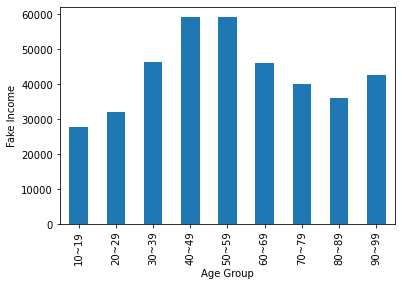

In [86]:
(
    df
    .groupby('age_group')
    ['fake_income']
    .mean()
    .plot(kind='bar')
)

plt.ylabel('Fake Income')
plt.xlabel('Age Group');

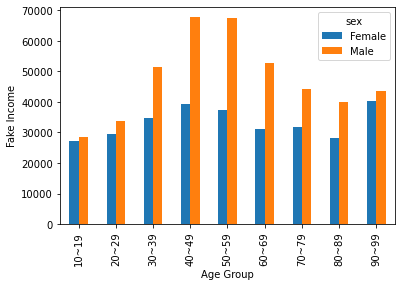

In [90]:
(
    df
    .groupby(['age_group', 'sex'])
    ['fake_income']
    .mean()
    .unstack()
    .plot(kind='bar')
)

plt.ylabel('Fake Income')
plt.xlabel('Age Group');

# Plot with Seaborn

handy *matplotlib* wrapper for statistical visualization

- pairgrid, stripplot, distplot, barplot, violinplot, etc.
- tidy data
- fine-tuning with matplotlib

In [37]:
import seaborn as sns

<AxesSubplot:xlabel='age_group', ylabel='fake_income'>

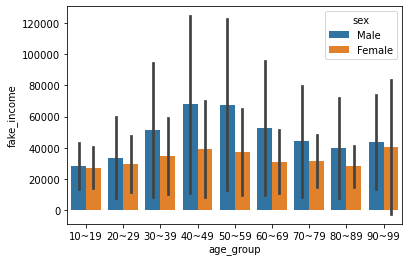

In [93]:
sns.barplot(data=df, x='age_group', y='fake_income', ci='sd', hue='sex')

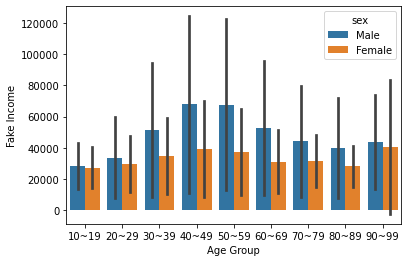

In [94]:
sns.barplot(data=df, x='age_group', y='fake_income', ci='sd', hue='sex')

plt.ylabel('Fake Income')
plt.xlabel('Age Group');